<a href="https://colab.research.google.com/github/Mayar215999/data-science-project/blob/main/happy_score_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

# Define file path
file_path = "/content/drive/MyDrive/happyscore.csv"

file_path

'/content/drive/MyDrive/happyscore.csv'

In [9]:
# Install necessary library for Google Colab (if not already installed)
!pip install google-colab

# Import necessary libraries
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Define file path
file_path = "/content/drive/MyDrive/happyscore"

# Load CSV file
df = pd.read_csv(file_path)

# Display basic information and the first few rows
df.info(), df.head()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.2 MB/s eta 0:00:00
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                111 non-null    object 
 1   adjusted_satisfaction  111 non-null    int64  
 2   avg_satisfaction       111 non-null    float64
 3   std_satisfaction       111 non-null    float64
 4   avg_income             111 non-null    float64
 5   median_income          111 non-null    float64
 6   income_inequality      111 non-null    float64
 7   region                 111 non-null    object 
 8   happyScore             111 non-null    float64
 9   GDP                    111 non-null    float64
 10  country.1              111 non-null    object 
dtypes: float

(None,
      country  adjusted_satisfaction  avg_satisfaction  std_satisfaction  \
 0    Armenia                     37               4.9              2.42   
 1     Angola                     26               4.3              3.19   
 2  Argentina                     60               7.1              1.91   
 3    Austria                     59               7.2              2.11   
 4  Australia                     65               7.6              1.80   
 
    avg_income  median_income  income_inequality  \
 0     2096.76    1731.506667          31.445556   
 1     1448.88    1044.240000          42.720000   
 2     7101.12    5109.400000          45.475556   
 3    19457.04   16879.620000          30.296250   
 4    19917.00   15846.060000          35.285000   
 
                           region  happyScore      GDP  country.1  
 0   'Central and Eastern Europe'       4.350  0.76821    Armenia  
 1           'Sub-Saharan Africa'       4.033  0.75778     Angola  
 2  'Latin Americ

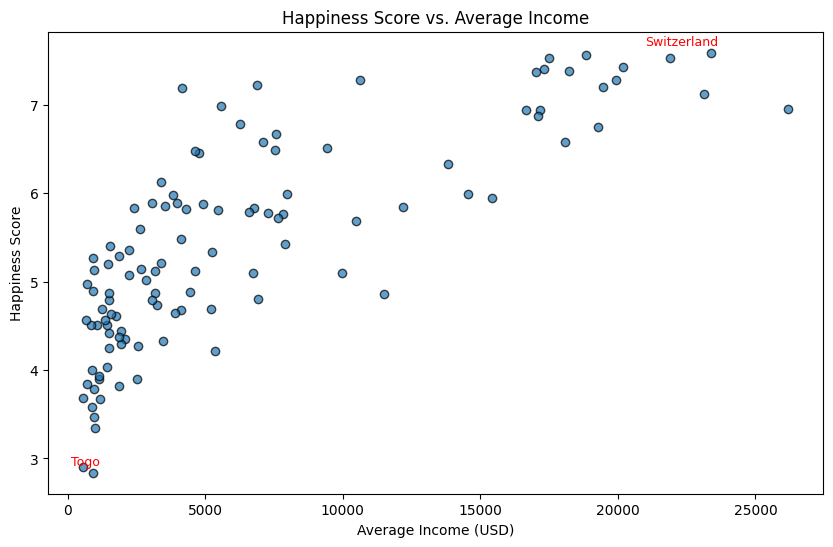

'/content/happiness_vs_income.png'

In [13]:

import matplotlib.pyplot as plt

# Sort data by avg_income in descending order
df_sorted = df.sort_values(by="avg_income", ascending=False)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_sorted["avg_income"], df_sorted["happyScore"], alpha=0.7, edgecolors="k")

# Label axes
plt.xlabel("Average Income (USD)")
plt.ylabel("Happiness Score")
plt.title("Happiness Score vs. Average Income")

# Annotate points of interest (highest & lowest happiness scores)
top_happy = df_sorted.nlargest(1, "happyScore")
low_happy = df_sorted.nsmallest(1, "happyScore")

for _, row in pd.concat([top_happy, low_happy]).iterrows():
    plt.annotate(row["country"], (row["avg_income"], row["happyScore"]),
                 textcoords="offset points", xytext=(5, 5), ha='right', fontsize=9, color='red')

# Save the figure
img_path = "/content/happiness_vs_income.png"
plt.savefig(img_path)
plt.show()

# Return image path for submission
img_path